In [1]:
#this is all from paper https://academic.oup.com/mnras/article/449/4/3981/1195237#92052944 figure 9

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../python')
import NGC5533_functions as nf
from noordermeer import *
import dataPython as dp

In [2]:
data = dp.getXYdata_wXYerr('traced_data/NGC5005_data.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

In [3]:
data_disk = dp.getXYdata('traced_data/ngc5005_disk.txt')
#traced disk for ngc 5005

#convert to numpy arrays for plotting
r_disk = np.asarray(data_disk['xx'])
v_disk = np.asarray(data_disk['yy'])

#smoothing --> creating a spline
r_disk = r_disk[r_disk.argsort()]
v_disk = v_disk[r_disk.argsort()]
idx = np.arange(0,np.shape(r_disk)[0])
f_v_disk = inter.InterpolatedUnivariateSpline(r_disk[idx%1==0], v_disk[idx%1==0], k=3)
f_v_disk_v = np.vectorize(f_v_disk)

In [4]:
data_halo = dp.getXYdata('traced_data/ngc5005_halo.txt')
#traced halo for ngc 5005

#convert to numpy arrays for plotting
r_halo = np.asarray(data_halo['xx'])
v_halo = np.asarray(data_halo['yy'])

#smoothing --> creating a spline
r_halo = r_halo[r_halo.argsort()]
v_halo = v_halo[r_halo.argsort()]
idx = np.arange(0,np.shape(r_halo)[0])
f_v_halo = inter.InterpolatedUnivariateSpline(r_halo[idx%1==0], v_halo[idx%1==0], k=3)
f_v_halo_v = np.vectorize(f_v_halo)

In [5]:
data_bulge = dp.getXYdata('traced_data/ngc5005_bulge.txt')
#traced bulge for ngc 5005

#convert to numpy arrays for plotting
r_bulge = np.asarray(data_bulge['xx'])
v_bulge = np.asarray(data_bulge['yy'])

#smoothing --> creating a spline
r_bulge = r_bulge[r_bulge.argsort()]
v_bulge = v_bulge[r_bulge.argsort()]
idx = np.arange(0,np.shape(r_bulge)[0])
f_v_bulge = inter.InterpolatedUnivariateSpline(r_bulge[idx%1==0], v_bulge[idx%1==0], k=5)
f_v_bulge_v = np.vectorize(f_v_bulge)

In [6]:
data_gas = dp.getXYdata('traced_data/ngc5005_gas.txt')
#traced gas for ngc 5005

#convert to numpy arrays for plotting
r_gas = np.asarray(data_gas['xx'])
v_gas = np.asarray(data_gas['yy'])

#smoothing --> creating a spline
r_gas = r_gas[r_gas.argsort()]
v_gas = v_gas[r_gas.argsort()]
idx = np.arange(0,np.shape(r_gas)[0])
f_v_gas = inter.InterpolatedUnivariateSpline(r_gas[idx%1==0], v_gas[idx%1==0], k=3)
f_v_gas_v = np.vectorize(f_v_gas)

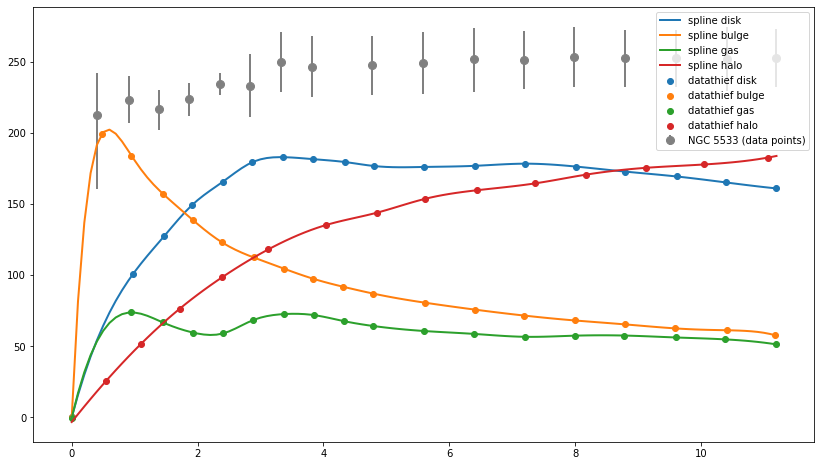

In [7]:
x = np.arange(0,11.3,0.1)
plt.figure(figsize=(14,8))

plt.scatter(r_disk,v_disk,label='datathief disk')
plt.plot(x, f_v_disk_v(x), linewidth=2, label='spline disk')
plt.scatter(r_bulge,v_bulge,label='datathief bulge')
plt.plot(x, f_v_bulge_v(x), linewidth=2, label='spline bulge')
plt.scatter(r_gas,v_gas,label='datathief gas')
plt.plot(x, f_v_gas_v(x), linewidth=2, label='spline gas')
plt.scatter(r_halo,v_halo,label='datathief halo')
plt.plot(x, f_v_halo_v(x), linewidth=2, label='spline halo')
plt.errorbar(r_dat,v_dat,yerr=[v_err0,v_err1], marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', label='NGC 5533 (data points)', linewidth=2)

plt.legend(loc='upper right')
plt.show()



In [8]:
np.savetxt("datatheif_disk_spline.txt", 
           np.transpose([x, f_v_disk_v(x)]), 
           delimiter='\t', 
           fmt='%10.5f',
           header='Datathief after Spline \n Gas mass density from https://academic.oup.com/mnras/article/449/4/3981/1195237#92052944 (fig.8) \n units: x-axis: kpc, y-axis: mass surface density (Msun pc^-2)')

np.savetxt("datatheif_bulge_spline.txt", 
           np.transpose([x, f_v_bulge_v(x)]), 
           delimiter='\t', 
           fmt='%10.5f',
           header='Datathief after Spline \n Gas mass density from https://academic.oup.com/mnras/article/449/4/3981/1195237#92052944 (fig.8) \n units: x-axis: kpc, y-axis: mass surface density (Msun pc^-2)')

np.savetxt("datatheif_gas_spline.txt", 
           np.transpose([x, f_v_gas_v(x)]), 
           delimiter='\t', 
           fmt='%10.5f',
           header='Datathief after Spline \n Gas mass density from https://academic.oup.com/mnras/article/449/4/3981/1195237#92052944 (fig.8) \n units: x-axis: kpc, y-axis: mass surface density (Msun pc^-2)')

np.savetxt("datatheif_halo_spline.txt", 
           np.transpose([x, f_v_halo_v(x)]), 
           delimiter='\t', 
           fmt='%10.5f',
           header='Datathief after Spline \n Gas mass density from https://academic.oup.com/mnras/article/449/4/3981/1195237#92052944 (fig.8) \n units: x-axis: kpc, y-axis: mass surface density (Msun pc^-2)')

Note: I am currently using the HI density profile because I don't understand where I would find one for the disk.